# **Introduction** ##

#### TO DO

2. Fix the Background and Indroduction Section
3. Check the Results and Discussion Session
4. Push final details to Github + Word count

### **Background**
Online gaming platforms such as Minecraft generate large volumes of user data, which can provide valuable insights into player behavior. Analyzing this data enables researchers and developers to understand patterns related to engagement, such as how demographic factors influence gameplay duration.
This project investigates whether a relationship exists between a player’s age and the total number of hours they spend playing Minecraft. This analysis may inform future design or engagement strategies by identifying age-related trends in user activity.
The dataset used in this project utilizes information from a key dataset, players.csv. The players.csv file contains demographic and subscription-related data for 196 Minecraft players. Key variables include age, gender identity, experience level, and subscription status. The dataset also includes a hashed email for anonymization and a player name for identification and merging purposes. 

Player experience is a categorical variable is categorized into five levels: Beginner, Amateur, Regular, Veteran, and Pro. Most players are either Amateur or Veteran, with 144 out of 196 users reported as subscribers. The average age of players is approximately 20.5 years, with a range from 8 to 50. Played hours are highly skewed, with a mean of 5.85 hours but a maximum of 223.1 hours, suggesting the presence of extreme outliers. Overall, the dataset provides a comprehensive snapshot of player demographics and engagement, though potential issues such as sampling bias and outliers must be addressed during analysis.


### **Research Questions**:
#### **Broad Question**:  What time windows are most likely to have large number of stimulaneous players? 

#### **Specific Question**: Can age predict the amount of playing time by individuals in players.csv?


## **Data Summary Statistics**:

| Variable Name | Type of Vector | Description | Potential Issues | Mean Values | Standard Deviation | Range
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
|  Age   |  Numeric (Interger)  |  Specific Age of the Player in Years  | NA or missing values where the participant did not provide their age| The mean age was 20.52062 years old, indicating most participants may have been aware of the study to participate in it, and were of university age. | The standard deviation was 6.17466725237736 years, indicating the demographic is clustered closer to the mean | 8 years-50 years indiactes even though the range spans a broad range, the low SD (6 years) suggests that most ages are concentrated near the average, with fewer people at the extreme ends. |
| Gender  |  Categorical (Character Vector)  |  Specific Gender of the participant   | NA or missing values where the participant did not provide their age | NOT APPLICABLE | NOT APPLICABLE | NOT APPLICABLE |
|  Experience  |  Categorical (Character Vector)  | Describes a persons self-ranked proficiency at playing the game | This category is subjective. The skill level of a person can depend on what their personal objective to playing the game was, and personal bias | NOT APPLICABLE |NOT APPLICABLE | NOT APPLICABLE | NOT APPLICABLE |
|  Subscribe | Logical Vector  |  Describes whether a person is subscribed to Minecraft  | Issues during analysis may occur if significant outliers may skew the data. | NOT APPLICABLE |NOT APPLICABLE | NOT APPLICABLE | NOT APPLICABLE |
|  Name  |  Categorical (Character Vector) |  Specific players name | If not considered a factor already in the data, then R may interpret the letters of a person name into code, making wrangling and interpreting the data more difficult without tidying.| NOT APPLICABLE |NOT APPLICABLE | NOT APPLICABLE | NOT APPLICABLE |
|  HashedEmail  | Categorical (Character Vector)  |  A persons email, encrypted for communication but used for identification by researchers  | If not considered a factor already in the data, then R may interpret the letters of a person name into code, making wrangling and interpreting the data more difficult without tidying.| NOT APPLICABLE |NOT APPLICABLE | NOT APPLICABLE | NOT APPLICABLE |
|  Played_hours   | Double (Interger with Decimals)   |  The number of hours a player played on the sever  | NA values or missing values may be present. As well, we are assuming it is played hours per month, not week, which may lead to inaccuracies when calculating effectively as a decimal point and cause data to have potential outliers. | The mean of 5.904639 hours indicates most participants played 6 hours total on the server, which is a stark contrast to the outliers of ~200 hours. | 28.4979342788085 hours.  Some players barely play at all (0 hours), while others play extensively (over 200 hours). This indicates a diverse gaming behavior. | 0 hours - 223.1 hours. The max playtime of 223.1 hours is nearly 8 standard deviations away from 0 hours, meaning a small subset of players plays an extreme amount compared to the rest. | 

**METHODS**

***1. Tidying the Dataset***

To answer the above broad and specific question, KNN regression was determined to be the best approach to assess the relationship between played hours to the age of the player. First, load the appropriate library's as below, to be used for accurate visualization and to utilize the correct code for tidying the data set. For the purposes of this analysis, the "players.csv" dataset will be used.

In [29]:
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(gridExtra)

Once there, the data is wrangled by first turning gender into a character vector, a data structure that holds text elements of the same type, such as categorical variabels as "Male", "Female", and other labels. Since vectors in R must contain the same type, gender is converted into a categorical varible using the 'c()' vector with each identity within it, and labelling it to gender. Mutate changes  Within mutate, experience is made into a factor, by modifying the data such that experience is equal to the as.factor operator, with experience contained inside. The same mutation is applied to gender. By making both of these columns factors, R is able to consider each observation as a word, or classification.

In [15]:
players_data <- read_csv("https://raw.githubusercontent.com/GracieR90/dsci-100-2025w2-group-12/refs/heads/main/players.csv")

gender <- c("Male", "Female", "Non-binary", "Other", "Prefer not to say", "Two-Spirited")

players_mutate <- players_data |>
    mutate(
        experience = as.factor(experience),
        gender = as.factor(gender))

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


We further tidy the data using `filter()`, `mutate()`, and `rename()`. The transformed data is assigned to `players_filtered` from `players_mutate`. `filter()` removes rows with missing values in the Age column by applying `is.na()` and negating it with `!`. This ensures only non-missing values remain for accurate numerical operations. `mutate()` converts the Age column to a numeric type using `as.numeric()`, ensuring proper calculations if Age was stored as a character or factor.

In [16]:
players_filtered <- players_mutate |>
    filter(!is.na(Age)) |>
    mutate(Age = as.numeric(Age))

To standardize column names for easier modeling, we use `rename()` to change them in the format of "new name = old name". The filtered data is assigned to `players_renamed`. We rename 'subscription' to 'subscribe', 'hashedEmail' to 'hashed_email', and 'Age' to 'age', while keeping other columns like 'experience', 'name', and 'gender' unchanged. This consistency simplifies data preparation for modeling or visualization.

In [17]:
players_renamed <- players_filtered |>
    rename(
        experience = experience,
    subscription = subscribe,
    hashed_email = hashedEmail,
    name = name,
    gender = gender,
    age = Age)

The subscription column is updated to use "Yes" and "No" labels instead of TRUE or FALSE for easier interpretation. Using `mutate()`, we convert the column with `factor()` to represent categorical data, setting the levels as `TRUE` and `FALSE` and the labels as `c("Yes", "No")`. We then use `select()` to remove unnecessary columns, such as 'hashed_email' and 'name', making the data simpler to interpret. Finally, we display the first six rows of the updated dataset with `head(players_logical)`.

In [28]:
players_logical <- players_renamed |>
    mutate(subscription = factor(subscription, levels = c(TRUE, FALSE), labels = c("Yes", "No"))) |>
    select(- hashed_email, - name)
head(players_logical)

experience,subscription,played_hours,gender,age
<fct>,<fct>,<dbl>,<fct>,<dbl>
Pro,Yes,30.3,Male,9
Veteran,Yes,3.8,Male,17
Veteran,No,0.0,Male,17
Amateur,Yes,0.7,Female,21
Regular,Yes,0.1,Male,21
Amateur,Yes,0.0,Female,17


***2. Exploring KNN Regression***

To analyze the data using KNN regression, we use the tidymodels workflow with a K-nearest neighbors approach and cross-validation to choose the best K value. First, we split the data into training (75%) and testing (25%) to train the model and evaluate its accuracy on unseen data. This helps identify overfitting or underfitting. We use `initial_split()` with `prop = 0.75` to set the training size, and `strata = played_hours` to keep the data balanced. The split is saved as `players_split`, and the actual training and testing sets are extracted with `training()` and `testing()`, stored in `players_train` and `players_test`. We also use `set.seed()` to make the split reproducible.

In [27]:
set.seed(5)

players_split <- initial_split(players_logical, prop = 0.75, strata = played_hours)
players_train <- training(players_split)
players_test <- testing(players_split)

Before modeling with KNN regression, we create a scatter plot to explore the relationship between age and time played, helping us spot trends, outliers, and data density to see if age is a good predictor. Using `ggplot()`, we map `age` to the x-axis and `played_hours` to the y-axis with `aes()`. `geom_point(alpha = 0.4)` adds semi-transparent points to reduce overplotting. `xlab()`, `ylab()`, and `ggtitle()` label the graph, while `ylim(0, 100)` focuses the view on the main data range. The plot is stored as the `eda` object.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


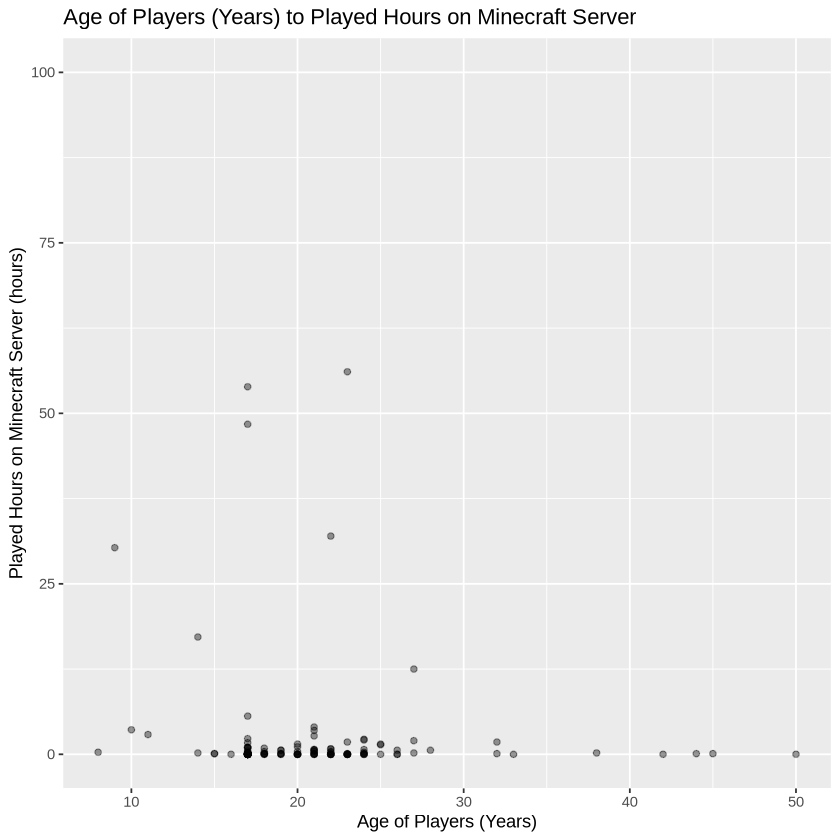

In [19]:
eda <- ggplot(players_train, aes(x = age, y = played_hours)) +
  geom_point(alpha = 0.4) +
  xlab("Age of Players (Years)") +
  ylab("Played Hours on Minecraft Server (hours)") +
    ylim(0,100) +
    ggtitle("Age of Players (Years) to Played Hours on Minecraft Server")
eda

***3. Setting up KNN regression***

First, we define a **recipe** to preprocess our data. A Recipe prepares a formula that describes to a model of the order of variables to predict and which data set to use, using `Recipe()`. We set up the model to predict the number of played hours to the age of the player in the format `played_hours ~ age` , based on our data using `data = players_train`. `step_scale` and `step_center()` are used to normalize the age predictor, by dividing by the standard division and subtracting the mean, respectively. This is critical for KNN regression, as it prevents large values from dominating distance calculations as part of finding the RMSPE. KNN uses distance to compare points, so all variables must be on the same scale—especially if one variable (like age) has a larger range. 

Next, we set up the **model specification** using `nearest_neighbor()` to define the prediction approach and neighboring points. `weight_func = "rectangular"` ensures equal weighting for neighbors. `set_engine("kknn")` specifies the KNN engine, and `set_mode("regression")` directs the model to predict numerical values and use metrics like RMSPE for evaluation. 

Now, We use `vfold_cv(players_train, v = 5, strata = played_hours)` to create 5 subsets of the training data for cross-validation, which evaluates model performance on unseen data. The training data is split into folds, with the model trained on k-1 parts and tested on the remaining part. This process is repeated with 5 folds, and we assign it to `players_vfold`.

Finally, we combine everything into a **workflow**, linking our recipe and model specification together. `Workflow()` combines the preprocessed recipe and model of our `knn_spec` to a workflow. A workflow is used to bundle together both these modelling steps into an organized object, by using `add_recipe(players_recipe)` and `add_model(knn_spec)` to add the model, and assign the code as `players_workflow`. This workflow ensures that preprocessing and model fitting happen in a structured, repeatable way. WE assign this to `players_workflow`. 

In [26]:
set.seed(5)

players_recipe <- recipe(played_hours ~ age, data = players_train) |> # This is according to the question
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

players_vfold <- vfold_cv(players_train, v = 5, strata = played_hours)

players_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec)

We tune the KNN regression model by testing K values from 1 to 50 (stepping by 2) using 5-fold cross-validation. First, we create a tibble of K values with `neighbors = seq(from = 1, to = min(50, nrow(players_train) - 1), by = 2)`, assigning it to `gridvals`. This grid helps the model assess the best K value to use, reducing ties in nearest neighbors. We then use `tune_grid()` to fit the model across 5 folds (`players_vfold`) with `gridvals`. The `collect_metrics()` function gathers performance metrics, and `filter()` keeps only the RMSPE results, with the lowest RMSPE indicating the best K for the model's prediction accuracy.

In [25]:
set.seed(5)


gridvals <- tibble(neighbors = seq(from = 1, to = min(50, nrow(players_train) - 1), by = 2))

players_results <- players_workflow |>
 tune_grid(resamples = players_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

head(players_results)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,23.66121,5,7.131193,Preprocessor1_Model01
3,rmse,standard,20.32177,5,7.246588,Preprocessor1_Model02
5,rmse,standard,20.60443,5,6.901952,Preprocessor1_Model03
7,rmse,standard,20.11366,5,7.027775,Preprocessor1_Model04
9,rmse,standard,19.62479,5,7.249493,Preprocessor1_Model05
11,rmse,standard,19.43575,5,7.306869,Preprocessor1_Model06


We identify the optimal number of neighbors by selecting the \( K \) value that corresponds to the lowest RMSPE, by fitlering `players_results`, to show only the minimum value of RMSPE, the mean, as `filter(mean == min(mean))`. From this, we can determine K = 29 is the best neighbors value to use in our model.

In [22]:
set.seed(5)

players_min <- players_results |>
    filter(mean == min(mean))

players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
29,rmse,standard,18.96774,5,7.329566,Preprocessor1_Model15


Now that we've tuned our model, it's time to evaluate how well it performs on unseen data. To do this, we'll measure its RMSPE on the test set.  

We retrain the K-NN regression model using the entire training dataset with \( K = 29 \), based on the minimum K value `players_min`, labeled as `kmin`. We update the spec set with this value and label it `players_spec`. Then, we create a new workflow, `players_fit`, by adding `players_spec` as the model. Using this workflow, we predict the time played for each test observation with `predict(players_test)`, generating a `.pred` column. We then combine the predicted values with the actual test data using `bind_cols(players_test)` and compare the RMSPE of the actual played hours (`truth`) and the predictions (`.pred`) using `metrics(truth = played_hours, estimate = .pred)`.

In [23]:
set.seed(5)

kmin <- players_min |> pull(neighbors)

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

players_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec) |>
  fit(data = players_train)

players_summary <- players_fit |>
  predict(players_test) |>
  bind_cols(players_test) |>
  metrics(truth = played_hours, estimate = .pred) |>
  filter(.metric == 'rmse')
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,40.37331


The final model's RMSPE test error is 40.37 hours, meaning the prediction error is roughly 40.37 hours. However, this is unacceptable, as most data falls between 0 to 25 years old. Since the RMSPE exceeds this range, the error is significant, indicating poor prediction performance. To improve the model, more data points and predictors are needed.

We create a `ggplot2` visualization to compare actual and predicted values based on played hours. The plot includes `geom_line` for the predicted values (.pred) with a line width of 1 to assess overfitting or underfitting. Axes are labeled, and the title dynamically reflects the selected number of neighbors in the KNN model (`"K = ", kmin`). The text size is adjusted for clarity using `theme(text = element_text(size = 12))`, and the plot is saved as `plot_final`. 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


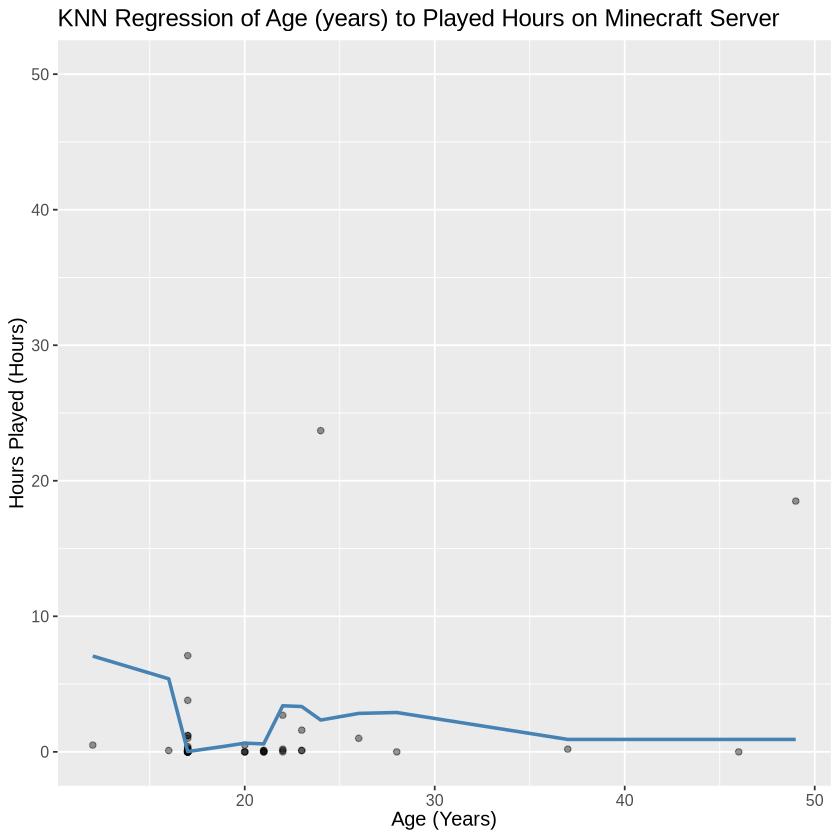

In [24]:
# Ensure the prediction grid includes 'age'
set.seed(5)

# Generate predictions
players_pred <- players_fit |>
  predict(players_test) |>
  bind_cols(players_test)

# Plot actual data points and prediction line
plot_final <- ggplot(players_test, aes(x = age, y = played_hours)) + 
  geom_point(alpha = 0.4) +
  geom_line(data = players_pred,
            mapping = aes(x = age, y = .pred),  # Ensure using correct column
            color = "steelblue",
            linewidth = 1) +
  xlab("Age (Years)") +
  ylab("Hours Played (Hours)") +
  theme(text = element_text(size = 12)) +
    ylim(0,50) +
    ggtitle("KNN Regression of Age (years) to Played Hours on Minecraft Server")

plot_final

### ***Results***

The following graph above depicts the predicted trend of the KNN regression model. At approximately 10-20 years old, there is a sharp increase in the hours played. This coulde suggest younger players spend more hours playing. However, there is a significant decline as they become older. After the drop, the trend line stabilizes with only smaller fluctuations to suggest players in their 20s have more varied playtimes, but overall played hours remain between 0 to 10 hours. The model predicts almost no change in Hours Played for players aged 30 and above. This suggests that KNN does not detect strong variations in playtime for older individuals, possibly due to low sample densitSeveral extreme outliers are visible, especially above 20+ hours at ages around 20 and 50. These outliers may be affecting the model, pulling the regression line slightly upwards at certain points. There are many fluctuations in the early age range.

# **Discussion**

### **Discussion of KNN Regression Results**

The KNN regression model overfit the data, likely due to a small K value, making it sensitive to noise and outliers. The blue line shows the KNN predictions for hours played based on age (K = 29), while the gray dots represent actual data points. The jagged regression line, particularly between ages 10 and 25, indicates fluctuations in predictions, while after age 25, the model predicts nearly constant values, suggesting weakened relationships or insufficient data. Outliers with large playtimes could be skewing the model. The RMSPE of 40.37 hours shows a large prediction error, with no clear relationship between age and playtime. Although the jagged line was expected due to KNN's overfitting tendencies, the flat line after age 25 confirmed data limitations, though we anticipated older players would play less. These findings suggest that KNN may not perform well with new data, particularly for older players, and point to potential gaps in the dataset for certain age groups. Future analyses may benefit from exploring different regression models and addressing data representation.

1. **How does increasing `K` affect the smoothness of the regression line?**  
2. **Would feature scaling improve the prediction quality?**  
3. **Does adding more data for older individuals change the results?**  
4. **Are there other factors (e.g., gaming experience, preferred game genre) that better explain playtime than age?**  
5. **Would a different regression model (e.g., polynomial or linear regression) perform better?**  